In [4]:
import pandas as pd

# Contagem da frequência das palavras
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Pré-processamento
import nltk
from nltk.stem import RSLPStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Criação da nuvem de palavras
!git -C "/content/word_cloud" pull || git clone https://github.com/amueller/word_cloud.git "/content/word_cloud"

!pip install fastapi -q
!pip install kaleido -q
!pip install python-multipart -q
!pip install uvicorn -q

%cd "/content/word_cloud"
!pip install . -q
%cd ../

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from os import path
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


Already up to date.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.4 MB/s eta 0:00:00
/content/word_cloud
  Preparing metadata (setup.py) ... done
/content


### Leitura do arquivo pré-processado

In [5]:
url = "https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv"

In [6]:
df = pd.read_csv(url, on_bad_lines = 'warn')

### Análises dos *dados*

In [7]:
#Apresenta as colunas do dataframe
df.columns

Index(['index', 'label', 'preprocessed_news'], dtype='object')

In [8]:
#Mostra a quantidade de notícias falsas e verdadeiras
df['label'].value_counts()

fake    3600
true    3600
Name: label, dtype: int64

<Axes: >

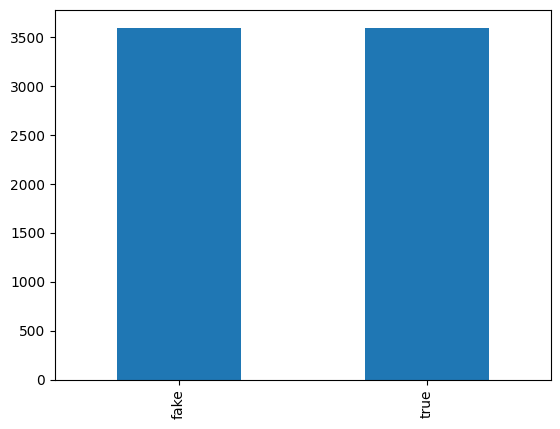

In [9]:
# Apresenta gráfico com a quantidade de notícias falsas e verdadeiras
df['label'].value_counts().plot.bar()

In [10]:
#Mostra as primeiras linhas do dataframe
df.head()

,index,label,preprocessed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,fake,radialista americano fala sobre pt vendem ilus...


In [11]:
df_fake = df[df.label == "fake"]
df_true = df[df.label == "true"]

Contagem da frequência das palavras

In [ ]:
true_word_count = df_true.preprocessed_news.str.split(expand=True).stack().value_counts()
print(true_word_count[:10])

In [ ]:
fake_word_count = df_fake.preprocessed_news.str.split(expand=True).stack().value_counts()
print(fake_word_count[:10])

In [ ]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["preprocessed_news"])

In [ ]:

vectorizer.get_feature_names_out()

array(['aa', 'aabb', 'aabertura', ..., 'zwi', 'zygmun', 'zygmunt'],
      dtype=object)

In [ ]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Pré-processamento do texto

No pré-processamento de linguagem natural é comum retirar palavras sem significado semântico (conhecidas em inglês como "stop words").

In [ ]:
# Stopwords em português:
nltk.download('stopwords')
stopwordspt = nltk.corpus.stopwords.words('portuguese')
stopwordsen = nltk.corpus.stopwords.words('english')
stopwordspt[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

Outro pré-processamento possível é a retirada de prefixos e sufixos desnecessários das palavras ( processo conhecido em inglês pelos termos "lemmatizing and stemming")

In [ ]:
# Download lista de radicais e sufixos
!wget https://github.com/michmech/lemmatization-lists/raw/master/lemmatization-pt.txt -q
nltk.download('rslp')

ptstemmer = RSLPStemmer()
enstemmer = WordNetLemmatizer()

# Convert to dictionary
lmztpt = {}
dic = open("lemmatization-pt.txt")
for line in dic:
  txt = line.split()
  lmztpt[txt[1]] = txt[0]

# Lemmatize wherever possible
def PortugueseMess(word):
  if word in lmztpt.keys():
    return lmztpt.get(word)
  else:
    return ptstemmer.stem(word)


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
